### 1. Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados.


In [27]:
#Instalação das bibliotecas
%pip install scipy seaborn
from IPython.display import clear_output
clear_output()  # Limpa a saída do pip install

In [17]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 🩺 Heart Prediction Quantum Dataset

📁 **Arquivo**: `Heart Prediction Quantum Dataset.csv`  
🔢 **Registros**: 500 linhas  
🧬 **Colunas**: 7 (6 features + 1 alvo)

---

## 📌 Descrição das Variáveis

| Variável                | Tipo           | Descrição                                                                              |
| ----------------------- | -------------- | -------------------------------------------------------------------------------------- |
| `Age`                   | Numérica       | Idade do paciente em anos                                                              |
| `Gender`                | Categórica     | Gênero: `0 = Feminino`, `1 = Masculino`                                                |
| `BloodPressure`         | Numérica       | Nível de pressão arterial                                                              |
| `Cholesterol`           | Numérica       | Nível de colesterol no sangue                                                          |
| `HeartRate`             | Numérica       | Frequência cardíaca (batimentos por minuto)                                            |
| `QuantumPatternFeature` | Numérica       | Feature artificial para diferenciação de modelos, especialmente em contextos quânticos |
| `HeartDisease`          | Binária (Alvo) | `0 = Sem doença cardíaca`, `1 = Com doença cardíaca`                                   |

---

## 🎯 Objetivo

O dataset tem como propósito **prever a presença de doença cardíaca** com base em atributos biomédicos e técnicos. Ele foi elaborado para permitir a aplicação de algoritmos de aprendizado de máquina — tanto convencionais quanto inspirados por padrões de computação quântica — visando comparar seus desempenhos preditivos.

---

## 🌐 Repositório

📎 Acesse o repositório com o dataset e exemplos de uso:  
**[👉 https://www.kaggle.com/datasets/shantanugarg274/heart-prediction-dataset-quantum](#)**


In [18]:
# Acessando o arquivo CSV
df = pd.read_csv("C:/Users/cassi/LLM/testBart/EXERCICIOS/archive/Heart Prediction Quantum Dataset.csv")

In [28]:
print(df.head())
# Substituindo os valores de genero e doença cardíaca
df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'})
df["HeartDisease"] = df["HeartDisease"].replace({0: 'Sem doenca', 1: 'Com doenca'})
print(df["Gender"].unique())
print(df["HeartDisease"].unique())

   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68    Male            105          191        107               8.362241   
1   58  Female             97          249         89               9.249002   
2   44  Female             93          190         82               7.942542   
3   72    Male             93          183        101               6.495155   
4   37  Female            145          166        103               7.653900   

  HeartDisease  
0   Com doenca  
1   Sem doenca  
2   Com doenca  
3   Com doenca  
4   Com doenca  
['Male' 'Female']
['Com doenca' 'Sem doenca']


## 📊 Contexto: Distribuição Normal

A **distribuição normal**, também conhecida como **distribuição Gaussiana**, é uma das distribuições estatísticas mais importantes na ciência de dados e aprendizado de máquina.

Ela descreve como os dados se distribuem em torno de uma média, com a maioria dos valores concentrados próximos à média (μ), e poucos valores nas extremidades. A forma da curva é **simétrica e em formato de sino**, sendo definida por dois parâmetros:

- **μ (média)**: indica o centro da distribuição.
- **σ (desvio padrão)**: indica o grau de dispersão dos dados em torno da média.

---

### ✏️ Características:

- Cerca de **68%** dos dados estão dentro de ±1σ da média.
- Cerca de **95%** dentro de ±2σ.
- E **99,7%** dentro de ±3σ.

---

### 🎯 Aplicações:

A distribuição normal é amplamente utilizada para:

- Análise de variáveis contínuas (ex: altura, idade, pressão arterial).
- Padronização com **escore Z**.
- Construção de modelos preditivos e intervalos de confiança.

Abaixo, temos um exemplo do gráfico com o histograma e a curva da Distribuição Normal.

![Curva da Distribuição Normal](https://miro.medium.com/v2/resize:fit:720/format:webp/1*Y5MFlQk5L8iOHz8DVRnEfA.png)


## Para a questão: Fazer o Histograma de 2 fetures para cada classe no dataset

#### 1. As classe utilizadas foram o Genero(male e female) e Doença Cardiaca(Sem doenca e Com doenca)

#### 2. Para cada classe foi feito o histograma de 2 features(Idade e Nível de pressão arterial).

#### 3. Os dois primeiros gráficos são os histogramas de Idade e Nível de Pressão Arterial para a classe Genero(male e female)

#### 4. Os dois ultimos gráficos são os histogramas de Idade e Nível de Pressão Arterial para a classe Doença Cardiaca(Sem doenca e Com doenca)


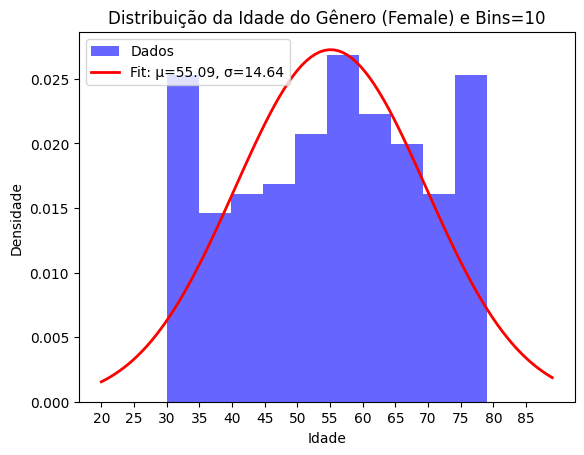

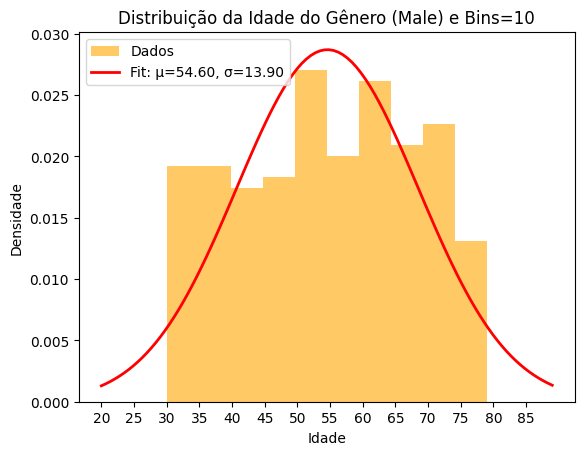

In [20]:
#Usando a classe de genero em idade

def plot_distribuicao_idade(df, genero, Bins, cor='blue'):
    # Filtra e organiza os dados
    dados = df[df['Gender'] == genero]['Age'].dropna().sort_values()

    # Convertendo para lista
    valores = dados.tolist() 

    # Limites do eixo x
    menor = min(valores) - 10
    maior = max(valores) + 10

    mu, sigma = norm.fit(valores)  # Ajustando a distribuição normal nos dados
    x = np.linspace(menor, maior, 100) # Intervalo de valores no eixo x
    pdf = norm.pdf(x, mu, sigma) # Função de densidade de probabilidade

    # Plotando o histograma
    plt.hist(valores, bins=Bins, density=True, alpha=0.6, color=cor, label='Dados')
    # Plotando a curva de densidade normal
    plt.plot(x, pdf, 'r-', label=f'Fit: μ={mu:.2f}, σ={sigma:.2f}', linewidth=2)

    # Gráfico
    plt.title(f'Distribuição da Idade do Gênero ({genero}) e Bins={Bins}')
    plt.xlabel('Idade')
    plt.ylabel('Densidade')
    plt.xticks(np.arange(menor, maior, 5))
    plt.legend()
    plt.show()

# Execução
plot_distribuicao_idade(df, 'Female', 10, cor='blue')
plot_distribuicao_idade(df, 'Male', 10, cor='orange')

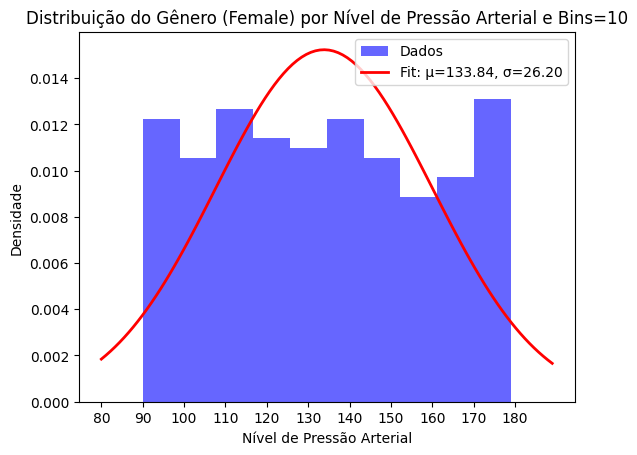

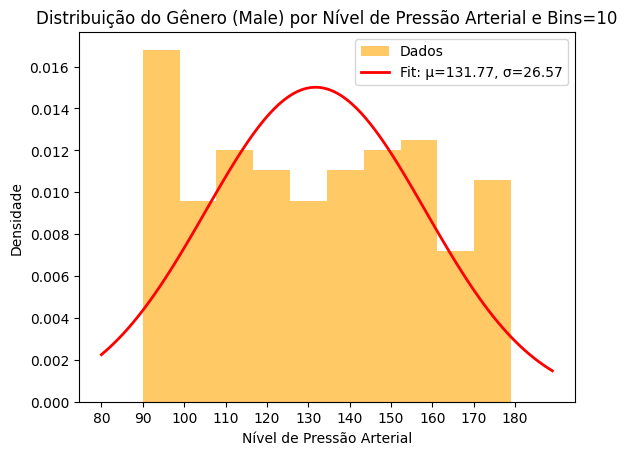

In [21]:
#Usando a classe de genero em nivel de pressão

def plot_distribuicao_idade(df, genero, Bins, cor='blue'):
    # Filtra e organiza os dados
    dados = df[df['Gender'] == genero]['BloodPressure'].dropna().sort_values()

    # Convertendo para lista
    valores = dados.tolist() 

    # Limites do eixo x
    menor = min(valores) - 10
    maior = max(valores) + 10

    mu, sigma = norm.fit(valores)  # Ajustando a distribuição normal nos dados
    x = np.linspace(menor, maior, 100) # Intervalo de valores no eixo x
    pdf = norm.pdf(x, mu, sigma) # Função de densidade de probabilidade

    # Plotando o histograma
    plt.hist(valores, bins=Bins, density=True, alpha=0.6, color=cor, label='Dados')
    # Plotando a curva de densidade normal
    plt.plot(x, pdf, 'r-', label=f'Fit: μ={mu:.2f}, σ={sigma:.2f}', linewidth=2)

    # Gráfico
    plt.title(f'Distribuição do Gênero ({genero}) por Nível de Pressão Arterial e Bins={Bins}')
    plt.xlabel('Nível de Pressão Arterial')
    plt.ylabel('Densidade')
    plt.xticks(np.arange(menor, maior, 10))
    plt.legend()
    plt.show()

# Execução
plot_distribuicao_idade(df, 'Female', 10, cor='blue')
plot_distribuicao_idade(df, 'Male', 10, cor='orange')

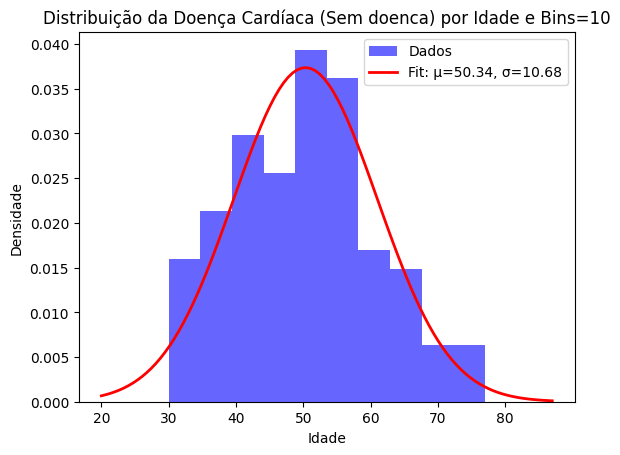

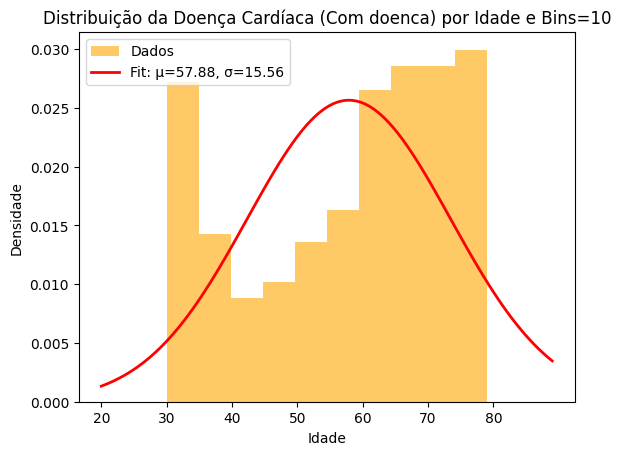

In [22]:
# Usando a classe Doença cardíaca para fazer o histograma da Idade

def plot_distribuicao_idade(df, genero, Bins, cor='blue'):
    # Filtra e organiza os dados
    dados = df[df['HeartDisease'] == genero]['Age'].dropna().sort_values()

    # Convertendo para lista
    valores = dados.tolist() 

    # Limites do eixo x
    menor = min(valores) - 10
    maior = max(valores) + 10

    mu, sigma = norm.fit(valores)  # Ajustando a distribuição normal nos dados
    x = np.linspace(menor, maior, 100) # Intervalo de valores no eixo x
    pdf = norm.pdf(x, mu, sigma) # Função de densidade de probabilidade

    # Plotando o histograma
    plt.hist(valores, bins=Bins, density=True, alpha=0.6, color=cor, label='Dados')
    # Plotando a curva de densidade normal
    plt.plot(x, pdf, 'r-', label=f'Fit: μ={mu:.2f}, σ={sigma:.2f}', linewidth=2)

    # Gráfico
    plt.title(f'Distribuição da Doença Cardíaca ({genero}) por Idade e Bins={Bins}')
    plt.xlabel('Idade')
    plt.ylabel('Densidade')
    plt.xticks(np.arange(menor, maior, 10))
    plt.legend()
    plt.show()

# Execução
plot_distribuicao_idade(df, 'Sem doenca', 10, cor='blue')
plot_distribuicao_idade(df, 'Com doenca', 10, cor='orange')

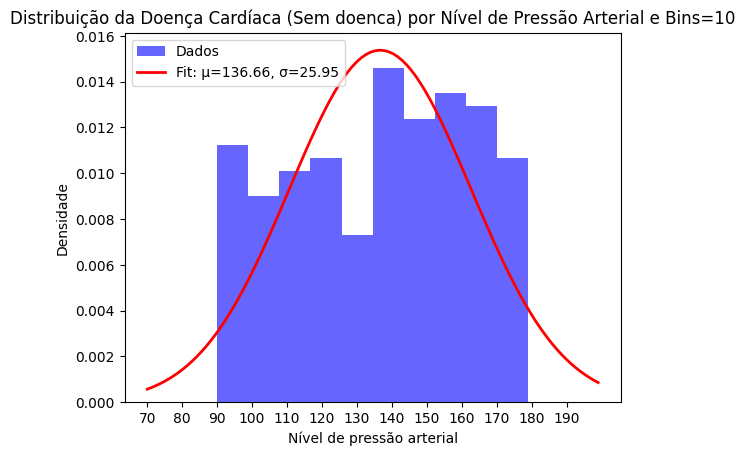

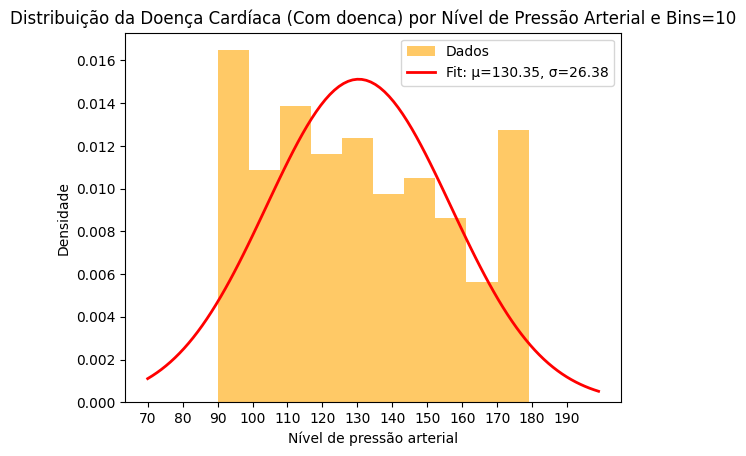

In [23]:
# Usando a classe Doença cardíaca para fazer o histograma da Idade

def plot_distribuicao_idade(df, genero, Bins, cor='blue'):
    # Filtra e organiza os dados
    dados = df[df['HeartDisease'] == genero]['BloodPressure'].dropna().sort_values()

    # Convertendo para lista
    valores = dados.tolist() 

    # Limites do eixo x
    menor = min(valores) - 20
    maior = max(valores) + 20

    mu, sigma = norm.fit(valores)  # Ajustando a distribuição normal nos dados
    x = np.linspace(menor, maior, 100) # Intervalo de valores no eixo x
    pdf = norm.pdf(x, mu, sigma) # Função de densidade de probabilidade

    # Plotando o histograma
    plt.hist(valores, bins=Bins, density=True, alpha=0.6, color=cor, label='Dados')
    # Plotando a curva de densidade normal
    plt.plot(x, pdf, 'r-', label=f'Fit: μ={mu:.2f}, σ={sigma:.2f}', linewidth=2)

    # Gráfico
    plt.title(f'Distribuição da Doença Cardíaca ({genero}) por Nível de Pressão Arterial e Bins={Bins}')
    plt.xlabel('Nível de pressão arterial')
    plt.ylabel('Densidade')
    plt.xticks(np.arange(menor, maior, 10))
    plt.legend()
    plt.show()

# Execução
plot_distribuicao_idade(df, 'Sem doenca', 10, cor='blue')
plot_distribuicao_idade(df, 'Com doenca', 10, cor='orange')

## Para a questão: Fazer 2 conjuntos de Histograma com tamanhos de bins diferentes.

#### 1. Para o 1º Conjunto de Histograma: Foi feito um histograma de 2 features(Idade e Nível de pressão arterial) para a classe Genero(male e female) e com 3 bins (variando de 5 a 15).

#### 2. Para o 2º Conjunto de Histograma: Foi feito um histograma de 2 features(Idade e Nível de pressão arterial) para a classe Doença Cardiaca(Sem doenca e Com doenca) e com 3 bins (variando de 5 a 15).


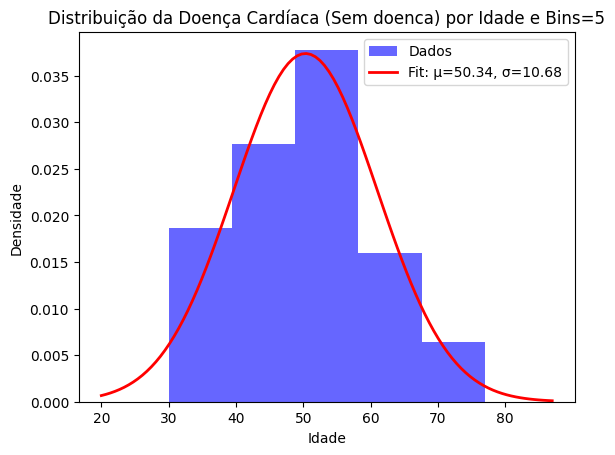

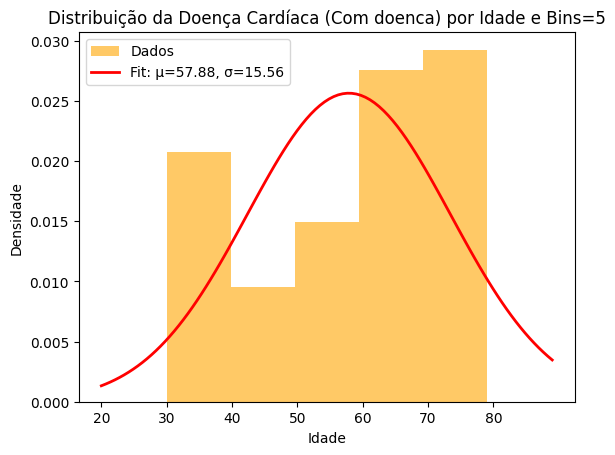

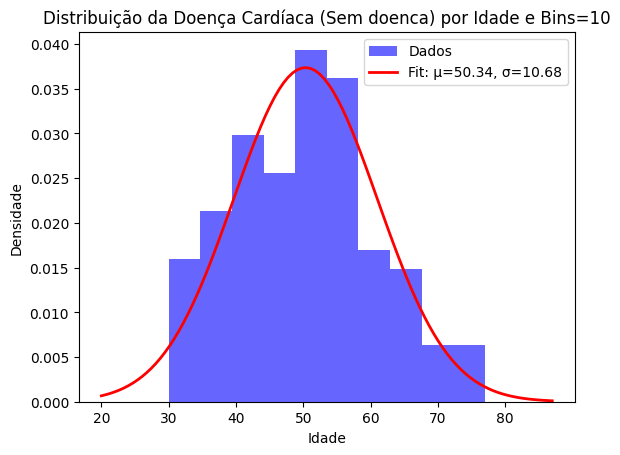

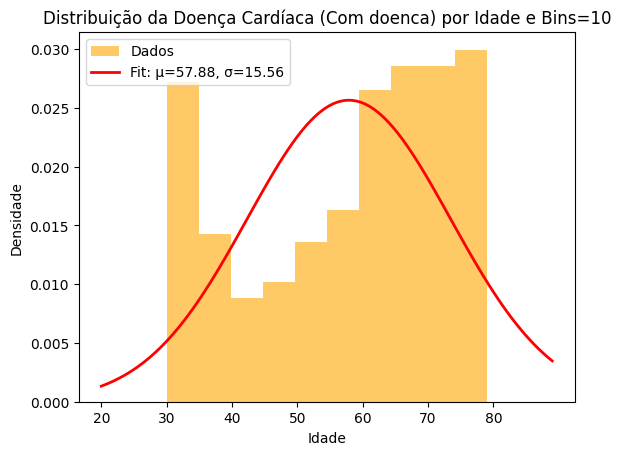

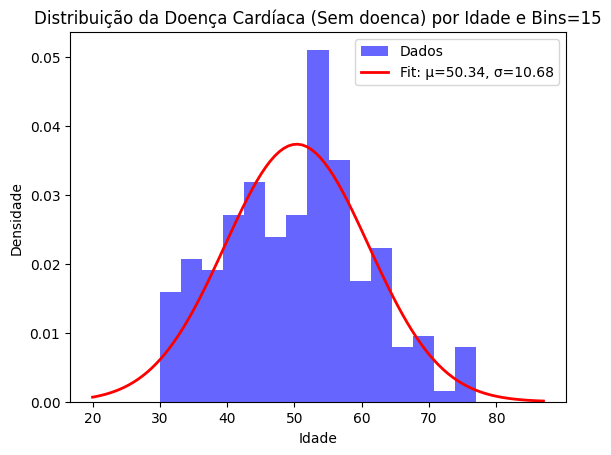

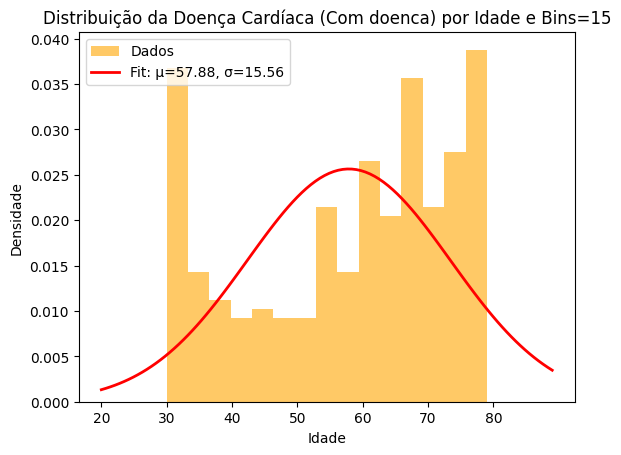

In [24]:
# Usando a classe Doença cardíaca para fazer o histograma da Idade

def plot_distribuicao_idade(df, genero, Bins, cor='blue'):
    # Filtra e organiza os dados
    dados = df[df['HeartDisease'] == genero]['Age'].dropna().sort_values()

    # Convertendo para lista
    valores = dados.tolist() 

    # Limites do eixo x
    menor = min(valores) - 10
    maior = max(valores) + 10

    mu, sigma = norm.fit(valores)  # Ajustando a distribuição normal nos dados
    x = np.linspace(menor, maior, 100) # Intervalo de valores no eixo x
    pdf = norm.pdf(x, mu, sigma) # Função de densidade de probabilidade

    # Plotando o histograma
    plt.hist(valores, bins=Bins, density=True, alpha=0.6, color=cor, label='Dados')
    # Plotando a curva de densidade normal
    plt.plot(x, pdf, 'r-', label=f'Fit: μ={mu:.2f}, σ={sigma:.2f}', linewidth=2)

    # Gráfico
    plt.title(f'Distribuição da Doença Cardíaca ({genero}) por Idade e Bins={Bins}')
    plt.xlabel('Idade')
    plt.ylabel('Densidade')
    plt.xticks(np.arange(menor, maior, 10))
    plt.legend()
    plt.show()

# Execução
plot_distribuicao_idade(df, 'Sem doenca', 5, cor='blue')
plot_distribuicao_idade(df, 'Com doenca', 5, cor='orange')

plot_distribuicao_idade(df, 'Sem doenca', 10, cor='blue')
plot_distribuicao_idade(df, 'Com doenca', 10, cor='orange')

plot_distribuicao_idade(df, 'Sem doenca', 15, cor='blue')
plot_distribuicao_idade(df, 'Com doenca', 15, cor='orange')

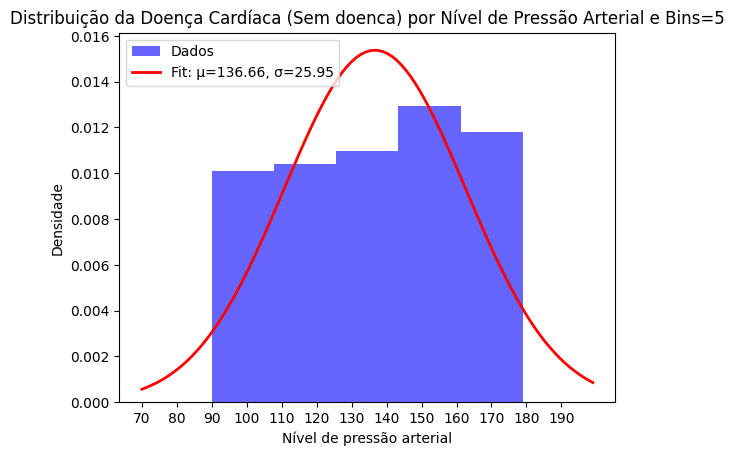

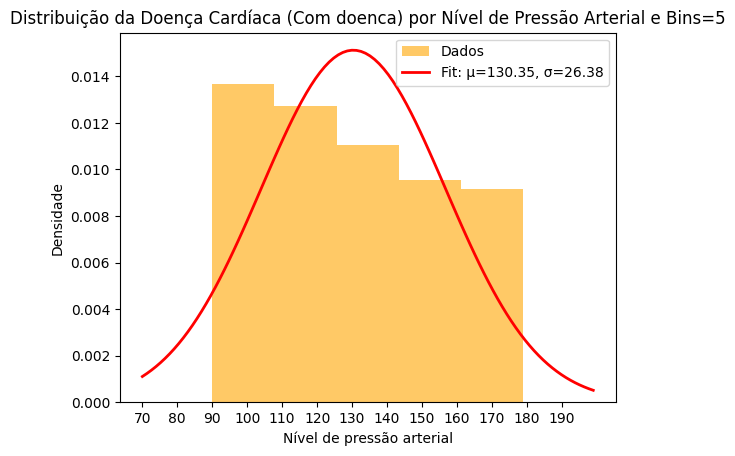

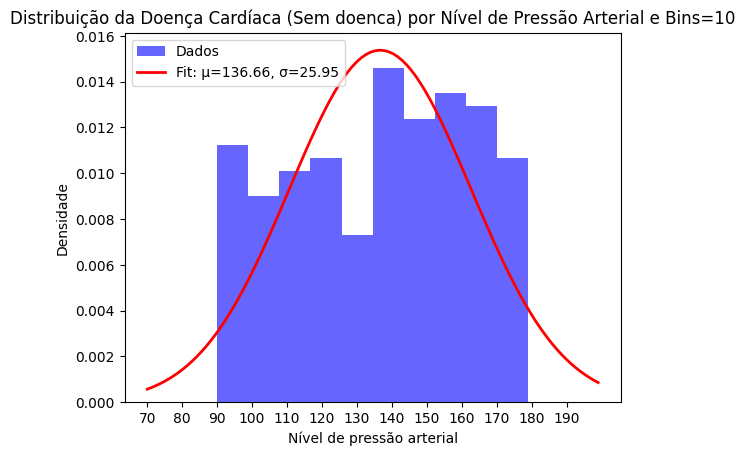

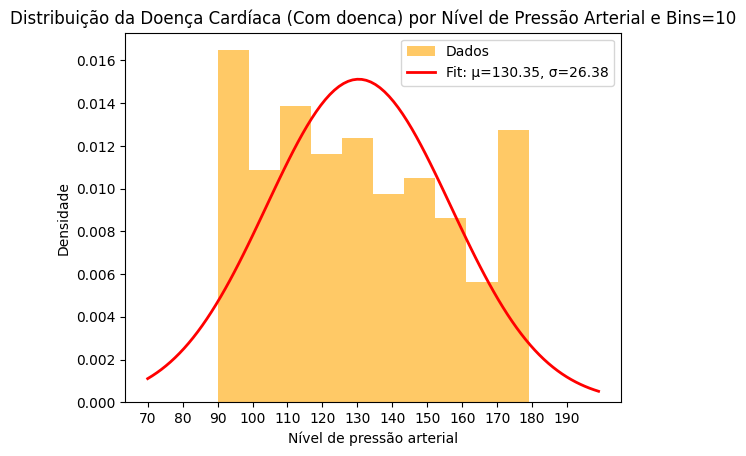

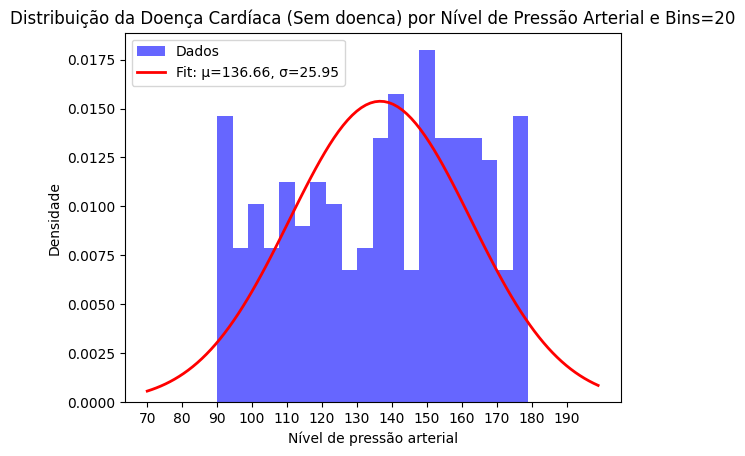

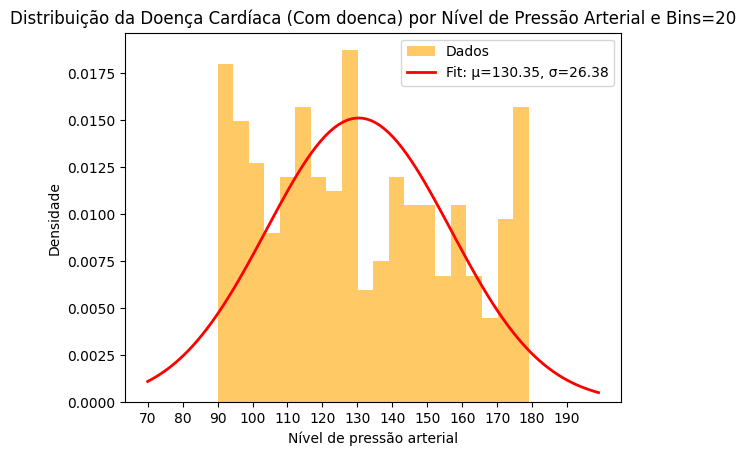

In [29]:
# Usando a classe Doença cardíaca para fazer o histograma da Idade

def plot_distribuicao_idade(df, genero, Bins, cor='blue'):
    # Filtra e organiza os dados
    dados = df[df['HeartDisease'] == genero]['BloodPressure'].dropna().sort_values()

    # Convertendo para lista
    valores = dados.tolist() 

    # Limites do eixo x
    menor = min(valores) - 20
    maior = max(valores) + 20

    mu, sigma = norm.fit(valores)  # Ajustando a distribuição normal nos dados
    x = np.linspace(menor, maior, 100) # Intervalo de valores no eixo x
    pdf = norm.pdf(x, mu, sigma) # Função de densidade de probabilidade

    # Plotando o histograma
    plt.hist(valores, bins=Bins, density=True, alpha=0.6, color=cor, label='Dados')
    # Plotando a curva de densidade normal
    plt.plot(x, pdf, 'r-', label=f'Fit: μ={mu:.2f}, σ={sigma:.2f}', linewidth=2)

    # Gráfico
    plt.title(f'Distribuição da Doença Cardíaca ({genero}) por Nível de Pressão Arterial e Bins={Bins}')
    plt.xlabel('Nível de pressão arterial')
    plt.ylabel('Densidade')
    plt.xticks(np.arange(menor, maior, 10))
    plt.legend()
    plt.show()

# Execução
plot_distribuicao_idade(df, 'Sem doenca', 5, cor='blue')
plot_distribuicao_idade(df, 'Com doenca', 5, cor='orange')

plot_distribuicao_idade(df, 'Sem doenca', 10, cor='blue')
plot_distribuicao_idade(df, 'Com doenca', 10, cor='orange')

plot_distribuicao_idade(df, 'Sem doenca', 20, cor='blue')
plot_distribuicao_idade(df, 'Com doenca', 20, cor='orange')

### 📈 Discussão dos histogramas do ponto de vista de classificação com aprendizado de máquina

1. É possível perceber que as distribuições de idade para os sexos masculino e feminino apresentam médias bastante próximas, sugerindo que essa variável, isoladamente, pode não ser um bom discriminador entre os gêneros.

2. Da mesma forma, os níveis de pressão arterial são semelhantes entre os dois sexos, com distribuições bastante sobrepostas, o que também pode dificultar a separação por modelos de classificação baseados apenas nessa variável.

3. Já ao observar a variável "Doença Cardíaca", nota-se uma **leve diferença entre nas medias de idades dos sexos**, indicando que a idade por sexo pode influenciar, ainda que moderadamente, na incidência da condição.

4. Além disso, ao cruzar os dados de pressão arterial com a presença ou ausência de doença cardíaca, observamos que **pessoas com doença cardíaca tendem a apresentar níveis de pressão mais baixos** em comparação com as que não têm a doença. Esse comportamento pode ser explorado como um indicativo relevante em classificadores.

---

### 🧮 Discussão sobre os tamanhos dos bins usados nos histogramas

Os tamanhos dos bins foram escolhidos **empiricamente** para explorar diferentes níveis de detalhe da distribuição:

- Com **bins = 20**, os histogramas apresentam maior precisão nos detalhes, devido ao número maior de intervalos. No entanto, isso também pode introduzir **ruído visual** e dificultar a interpretação global da distribuição.
- Com **bins = 5 ou 10**, a visualização fica mais limpa e facilita a identificação de tendências gerais, embora possa **ocultar variações mais sutis** nos dados.

Foram testados diferentes tamanhos de bins (5, 10 e 20) especialmente na análise da variável **Doença Cardíaca (com ou sem)**, para avaliar como a granularidade da visualização influencia a capacidade de interpretação das classes. Essa prática é fundamental para identificar possíveis padrões relevantes para a tarefa de classificação.
